<a href="https://colab.research.google.com/github/lohan20s/StockMarketAnalysis/blob/main/S%26P50_Market_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Extract s&p500 data from the internet and extract trends

In [47]:
#import s&p 500 data

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Download S&P 500 data from Yahoo Finance
try:
  sp500 = yf.download("^GSPC", start="2015-01-01")
except Exception as e:
  print(f"Error downloading data: {e}")
  sp500 = pd.DataFrame()

#print sp500 data
print (sp500.head)


[*********************100%***********************]  1 of 1 completed

<bound method NDFrame.head of Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2015-01-02  2058.199951  2072.360107  2046.040039  2058.899902  2708700000
2015-01-05  2020.579956  2054.439941  2017.339966  2054.439941  3799120000
2015-01-06  2002.609985  2030.250000  1992.439941  2022.150024  4460110000
2015-01-07  2025.900024  2029.609985  2005.550049  2005.550049  3805480000
2015-01-08  2062.139893  2064.080078  2030.609985  2030.609985  3934010000
...                 ...          ...          ...          ...         ...
2025-02-27  5861.569824  5993.689941  5858.779785  5981.879883  5057680000
2025-02-28  5954.500000  5959.399902  5837.660156  5856.740234  6441140000
2025-03-03  5849.720215  5986.089844  5810.910156  5968.330078  5613850000
2025-03-04  5778.149902  5865.080078  5732.589844  5811.979980  613811

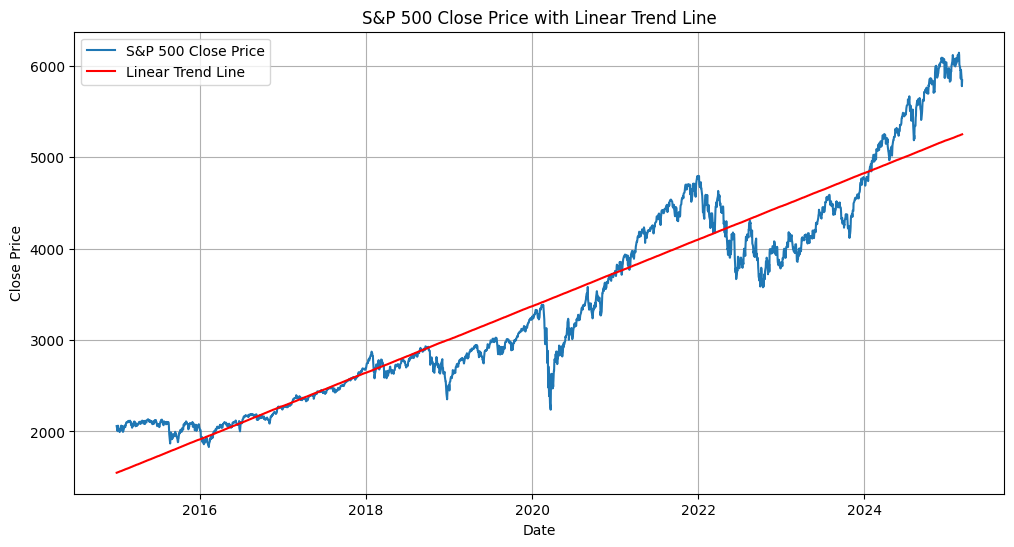

In [48]:
# plot date against s&p 500 at close and fit a linear trend line

if not sp500.empty:
  # Convert the index to datetime objects
  sp500.index = pd.to_datetime(sp500.index)

  # Fit a linear trend line
  x = np.arange(len(sp500))
  y = sp500["Close"]
  slope, intercept = np.polyfit(x, y, 1)

  # Create the plot
  plt.figure(figsize=(12, 6))
  plt.plot(sp500.index, sp500["Close"], label="S&P 500 Close Price")


  # Add labels and title
  plt.xlabel("Date")
  plt.ylabel("Close Price")
  plt.title("S&P 500 Close Price with Linear Trend Line")


  # Plot the linear trend line
  plt.plot(sp500.index, slope * x + intercept, color="red", label="Linear Trend Line")

  # Add legend
  plt.legend()

  # Show the plot
  plt.grid(True)
  plt.show()
else:
    print("DataFrame is empty. Cannot create the plot.")


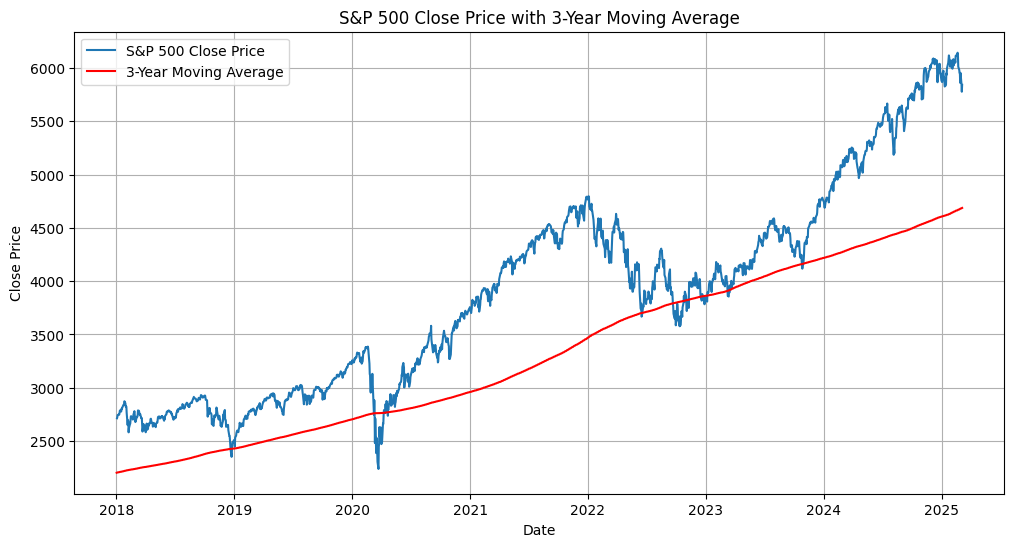

In [49]:
# fit a moving average line instead (with an average over 3 years)

if not sp500.empty:
  # Convert the index to datetime objects
  sp500.index = pd.to_datetime(sp500.index)

  # Calculate the 3-year moving average assuming 252 trading days in a year
  sp500['MA3Y'] = sp500['Close'].rolling(window=3*252).mean()

  # Create the plot and plot only data from 2018 to 2025 (because the first three years will have one rolling average value)
  plt.figure(figsize=(12, 6))
  plt.plot(sp500.index[3*252:], sp500["Close"][3*252:], label="S&P 500 Close Price")

  # Plot the moving average
  plt.plot(sp500.index, sp500['MA3Y'], label='3-Year Moving Average', color='red')

  # Add labels and title
  plt.xlabel("Date")
  plt.ylabel("Close Price")
  plt.title("S&P 500 Close Price with 3-Year Moving Average")

  # Add legend
  plt.legend()

  # Show the plot
  plt.grid(True)
  plt.show()
else:
    print("DataFrame is empty. Cannot create the plot.")
